# I) Traitements des 10 fichiers de Cornell


## 1) Importation des modules nécessaires

Importation des Modules nécessaires

In [2]:
!pip install opencv-python
import cv2
import tensorflow as tf
config=tf.ConfigProto()
session=tf.Session(config=config)
from tensorflow import keras
import os
import shutil
import tensorflow as tf
from tensorflow.keras import backend as K
K.set_session(session)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.models import model_from_json
from math import *

import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
from os.path import isfile,join
from os import listdir
from tensorflow.python.keras.applications import ResNet50, VGG16, DenseNet121, MobileNet, Xception



D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

## 2) Création des fichiers photos et rectangles rassemblés(répértoire)

Il faut créer un répértoire exploitable directement par Python dans lequel on peut aller chercher les images et les rectangles de grasping.

In [3]:
base_dir='D:/Léopold/Base Cornell/bancel'
os.mkdir(base_dir)
pictures_dir=os.path.join(base_dir,'pictures')
os.mkdir(pictures_dir)
rectangles_dir=os.path.join(base_dir,'rectangles')
os.mkdir(rectangles_dir)




On ouvre les 10 fichiers sur le bureau dans lequel on effectue le transfert dans le fichier verdiere ou il y'a le fichier image et le fichier rectangle de grasping. La problématique était lié à la différence du nombre d'images contenu dans chacun des fichiers. En effet, les fichiers 1 à 8 contiennent 100 images et 100 rectangles de grasping dits positifs. Puis, les fichiers 9 et 10 contiennent respectivement 50 et 34 fichiers(images et rectangles de Grasping).

In [4]:
#print(original_dataset_dir[0])
#i=0

#fnames=['pcd0{}{}r.png'.format(j, i) for i in range(50)] boucle for à faire par la suite
for j in range(1,9):
    original_dataset_dir='D:/Léopold/Base Cornell/0{}'.format(j)
    fnames=['pcd0{}{}r.png'.format(j, i) for i in range(10,100)]
    for fname in fnames:
        src=os.path.join(original_dataset_dir,fname)
        dst=os.path.join(pictures_dir,fname)
        shutil.copyfile(src,dst)
       
    fnames=['pcd0{}{}cpos.txt'.format(j, i) for i in range(10,100)]
    for fname in fnames:
        src=os.path.join(original_dataset_dir,fname)
        dst=os.path.join(rectangles_dir,fname)
        shutil.copyfile(src,dst)
        
# on va chercher les fichiers qui commencent par 00,01,02...
    fnames=['pcd0{}'.format(j)+'0'+'{}r.png'.format(i) for i in range(10)]
    for fname in fnames:
        src=os.path.join(original_dataset_dir,fname)
        dst=os.path.join(pictures_dir,fname)
        shutil.copyfile(src,dst)
       
    fnames=['pcd0{}'.format(j)+'0'+'{}cpos.txt'.format(i) for i in range(10)]
    for fname in fnames:
        src=os.path.join(original_dataset_dir,fname)
        dst=os.path.join(rectangles_dir,fname)
        shutil.copyfile(src,dst)
##
j=9

original_dataset_dir='D:/Léopold/Base Cornell/09'
fnames=['pcd09{}r.png'.format(i) for i in range(10,50)]
for fname in fnames:
        src=os.path.join(original_dataset_dir,fname)
        dst=os.path.join(pictures_dir,fname)
        shutil.copyfile(src,dst)

fnames=['pcd09{}cpos.txt'.format(i) for i in range(10,50)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(rectangles_dir,fname)
    shutil.copyfile(src,dst)
# on va chercher les fichiers qui commencent par 00,01,02...
fnames=['pcd0{}'.format(j)+'0'+'{}r.png'.format(i) for i in range(10)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(pictures_dir,fname)
    shutil.copyfile(src,dst)
       
fnames=['pcd0{}'.format(j)+'0'+'{}cpos.txt'.format(i) for i in range(10)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(rectangles_dir,fname)
    shutil.copyfile(src,dst)

j=10  
        
original_dataset_dir='D:/Léopold/Base Cornell/10'
fnames=['pcd10{}r.png'.format(i) for i in range(10,34)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(pictures_dir,fname)
    shutil.copyfile(src,dst)


fnames=['pcd10{}cpos.txt'.format(i) for i in range(10,34)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(rectangles_dir,fname)
    shutil.copyfile(src,dst)
# on va chercher les fichiers qui commencent par 00,01,02...
fnames=['pcd{}'.format(j)+'0'+'{}r.png'.format(i) for i in range(10)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(pictures_dir,fname)
    shutil.copyfile(src,dst)
       
fnames=['pcd{}'.format(j)+'0'+'{}cpos.txt'.format(i) for i in range(10)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(rectangles_dir,fname)
    shutil.copyfile(src,dst)



In [5]:
print(len(pictures_dir))

39


## 3) Création des fichiers X_train et Y_train 

In [6]:
pixel_x=64
pixel_y=48

X1=np.zeros((884,pixel_x,pixel_y,3))
Y1=np.zeros((884,8))
X=[]
Y=[]
repertoire=pictures_dir
repertoire_carré=rectangles_dir
A=[]
B=[]
List_noms_rect=listdir(repertoire_carré)
for i in range(len(listdir(repertoire))):
    x_temp=cv2.imread('bancel/pictures/'+listdir(repertoire)[i])
    X1[i]=(cv2.resize(src=x_temp,dsize=(48,64),interpolation=cv2.INTER_AREA))
    with open('bancel/rectangles/'+List_noms_rect[i],"r") as fich:
        for k in range(0,8,2):
            ligne=fich.readline()
            a=ligne[0:3]
            A+=[a]
            b=ligne[4:]
            B+=[b]
            ## GROS PROBLEME, N (FAISAIT UNE RESIZE PAS LINEAIRE DU TOUT
            Y1[i,k]=float(a)/13.3333333 #=640/48
            Y1[i,k+1]=float(b)/7.5 #=480/64   
        
print(Y1)

[[18.97500005 42.62666667 23.17500006 ... 46.66666667 18.82500005
  46.09333333]
 [21.67500005 35.8812     21.45000005 ... 43.6        24.45000006
  36.14786667]
 [19.20000005 40.1972     22.27500006 ... 44.         19.12500005
  43.7972    ]
 ...
 [24.67500006 38.79906667 24.30000006 ... 46.66666667 20.92500005
  38.26666667]
 [17.40000004 44.4056     25.27500006 ... 39.86666667 18.07500005
  37.46666667]
 [17.02500004 47.2964     21.22500005 ... 41.2        16.72500004
  42.        ]]


## 4) Nécessité de préparer les données

On divise la valeur du pixel par 255 pour donner un nombre entre [0,1] au réseau. Pas de données hétérogènes

In [7]:
X_train=X1
#on passe les pixels de 1 à 255 à entre 0 et 1
for i in range(len(X_train)):
    X_train[i]=X_train[i]/255

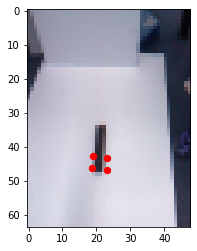

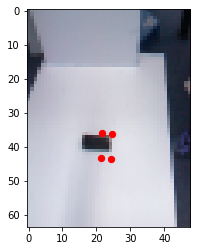

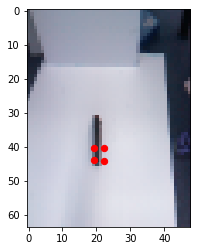

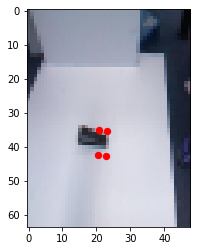

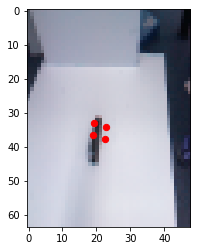

In [8]:
for i in range(5):
    im=plt.imshow(X_train[i])
    plt.scatter(x=[Y1[i,n] for n in range(0,8,2)], y=[Y1[i,n+1] for n in range(0,8,2)], c='r', s=40)
    plt.show()


In [9]:
#on adapte les coodonnées des Y_train au centrage des photos réalisé juste après
Y_train=Y1.copy()

#on définit les nouvelles bordures
lim_ord=[15,52]
lim_abs=[5,40]


for i in range(len(Y_train)):
    for j in range(0,8,2):
        Y_train[i][j]=Y_train[i][j]-lim_abs[0]
        Y_train[i][j+1]=Y_train[i][j+1]-lim_ord[0]

In [10]:
#on réduit la taille des images pour centrer sur les objets

X_train=X_train[:,lim_ord[0]:lim_ord[1],lim_abs[0]:lim_abs[1],:]

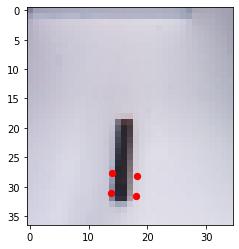

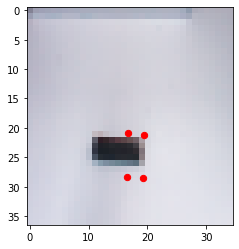

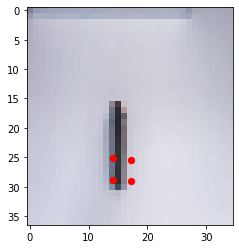

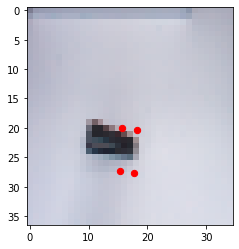

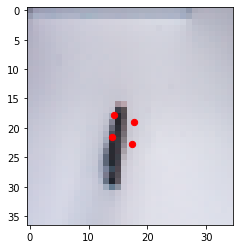

In [11]:
for i in range(5):
    im=plt.imshow(X_train[i])
    plt.scatter(x=[Y_train[i,n] for n in range(0,8,2)], y=[Y_train[i,n+1] for n in range(0,8,2)], c='r', s=40)
    plt.show()


Data augmentation 

Symétrie par rapport à x=...

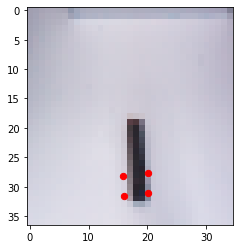

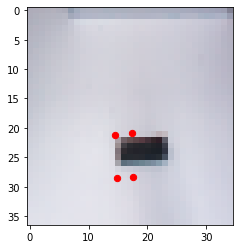

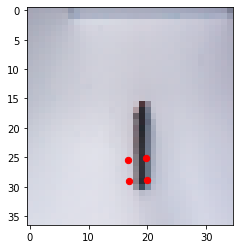

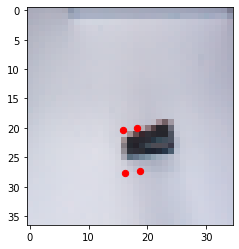

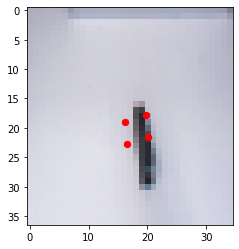

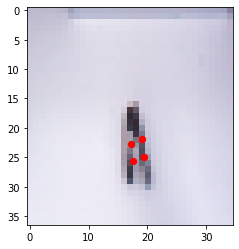

In [12]:
X_aug_x=np.zeros((np.shape(X_train)))
Y_aug_x=np.zeros((np.shape(Y_train)))
for i in range (len(X_train)):
    for j in range(np.shape(X_train)[1]):
        for k in range(np.shape(X_train)[2]):
            X_aug_x[i,j,k]=X_train[i,j,-(1+k)]

#On va egalement tracer les points des rectangles pour vérifier la transformation

milieu_x=int((lim_abs[1]-lim_abs[0])/2)
for i in range(len(Y_train)):
    for j in range(0,8,2):
        Y_aug_x[i,j]=milieu_x-(Y_train[i][j]-milieu_x)
        #l'ordonneé reste inchangée
        Y_aug_x[i,j+1]=Y_train[i][j+1]
    if i<=5:
        im=plt.imshow(X_aug_x[i])
        plt.scatter(x=[Y_aug_x[i,n] for n in range(0,8,2)], y=[Y_aug_x[i,n+1] for n in range(0,8,2)], c='r', s=40)
        plt.show()

Même chose pour une symétrie par rapport à Y=...

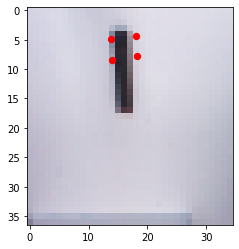

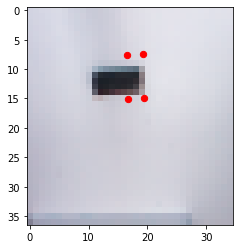

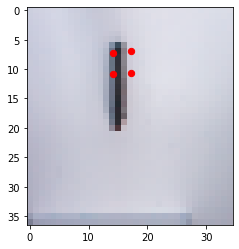

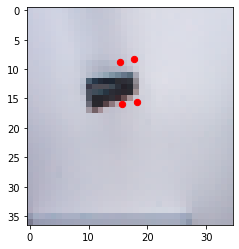

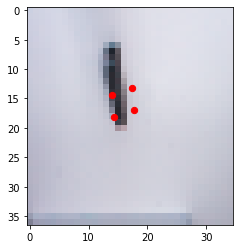

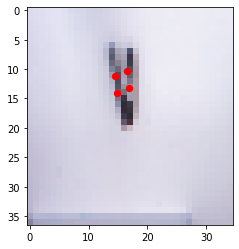

In [13]:
X_aug_y=np.zeros((np.shape(X_train)))
Y_aug_y=np.zeros((np.shape(Y_train)))
for i in range (len(X_train)):
    for j in range(np.shape(X_train)[2]):
        for k in range(np.shape(X_train)[1]):
            X_aug_y[i,k,j]=X_train[i,-(1+k),j]
            
milieu_y=int((lim_ord[1]-lim_ord[0])/2)
for i in range(len(Y_train)):
    for j in range(0,8,2):
        Y_aug_y[i,j+1]=milieu_y-(Y_train[i][j+1]-milieu_y)
        #l'ordonneé reste inchangée
        Y_aug_y[i,j]=Y_train[i][j]
    if i<=5:
            im=plt.imshow(X_aug_y[i])
            plt.scatter(x=[Y_aug_y[i,n] for n in range(0,8,2)], y=[Y_aug_y[i,n+1] for n in range(0,8,2)], c='r', s=40)
            plt.show()

In [14]:
# On fusionne maintenant ce que l'on vient de créer à la base de donnée initiale:
X_train_aug=np.concatenate((X_train,X_aug_x,X_aug_y), axis=0)
Y_train_aug=np.concatenate((Y_train,Y_aug_x,Y_aug_y), axis=0)

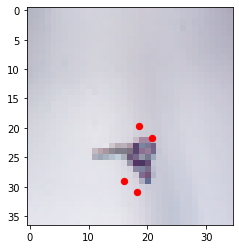

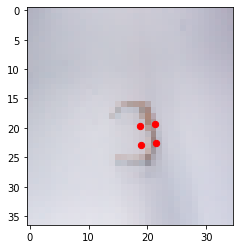

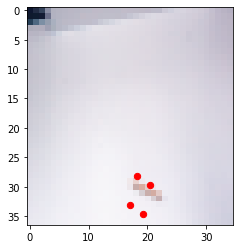

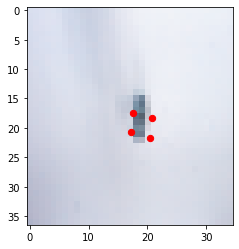

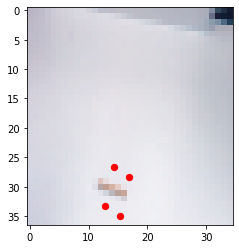

In [15]:
for i in range(5):
            j=rd.randint(0,len(X_train_aug))
            im=plt.imshow(X_train_aug[j])
            plt.scatter(x=[Y_train_aug[j,n] for n in range(0,8,2)], y=[Y_train_aug[j,n+1] for n in range(0,8,2)], c='r', s=40)
            plt.show()

Transformation en coordonnées de rectangle

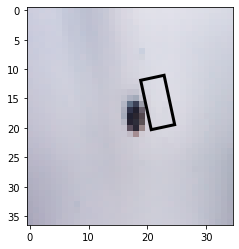

angle -102.09475710635874 1.9199885197786353


In [35]:
Y_train_rec=np.zeros((np.shape(Y_train_aug)[0],5))

for i in range(len(Y_train_aug)):
    Y_train_rec[i][0]=Y_train_aug[i][0]
    Y_train_rec[i][1]=Y_train_aug[i][1]
    cote1=np.sqrt((Y_train_aug[i][2]-Y_train_aug[i][0])**2+(Y_train_aug[i][3]-Y_train_aug[i][1])**2)
    cote2=np.sqrt((Y_train_aug[i][4]-Y_train_aug[i][2])**2+(Y_train_aug[i][5]-Y_train_aug[i][3])**2)
    width=cote1
    lengh=cote2
    pd_scal_angle=acos(((Y_train_aug[i][2]-Y_train_aug[i][0]))/cote1)
    Y_train_rec[i][2]=cote1
    Y_train_rec[i][3]=cote2
    if (Y_train_aug[i][3]-Y_train_aug[i][1])/cote1 >0:
        Y_train_rec[i][4]=pd_scal_angle*180/np.pi
    if (Y_train_aug[i][3]-Y_train_aug[i][1])/cote1 <=0:
        Y_train_rec[i][4]=-pd_scal_angle*180/np.pi
j=rd.randint(0,2552)

fig,ax = plt.subplots(1)
ax.imshow(X_train_aug[j])
rect=patches.Rectangle((Y_train_rec[j][0],Y_train_rec[j][1]),Y_train_rec[j][2],Y_train_rec[j][3],angle=Y_train_rec[j][4],fill=False, linewidth=3)
ax.add_patch(rect)
plt.show()
print('angle',Y_train_rec[j][4],(Y_train_aug[j][3]-Y_train_aug[i][1])/cote1)

# II) Création du Réseau de Neurones

# 1) Création du réseau de Neurones

On va créer une structure de réseau en implémentant un réseau préentrainé(transfer learning) pour qu'il identifie plus facilement les caractéristiques.

In [16]:
def get_dropout(input_tensor, p=0.5, mc=False):
    if mc:
        return Dropout(p)(input_tensor, training=True)
    else:
        return Dropout(p)(input_tensor)
    
def build_model(mc=False):
    model=Sequential()
    model.add(VGG16(include_top=False, pooling='avg', weights='imagenet'))
    #model.add(Conv2D(2,kernel_size=(3,3),activation='relu',input_shape=(64,48,3)))
    #model.add(Conv2D(64,(3,3),activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.25))
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(8))
    model.layers[0].trainable=False
    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    
    return(model)



In [17]:
mc_model = build_model(mc=True)
print(mc_model)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
#utilise les poids d'un réseau déjà entrainé par moi
mc_model.load_weights('model.h5')

## 2) Nécessité d'une K-fold Validation

Nécessité de K-fold validation

In [ ]:
k = 1
num_val_samples = len(X_train) // k
num_epochs = 2000
all_scores = []
list_val=[]

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
history = LossHistory()
for i in range(k):
    #print(f'Processing fold # {i}')
    val_data = X_train[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = Y_train[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                           [X_train[:i * num_val_samples],
                            X_train[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [Y_train[:i * num_val_samples],
                            Y_train[(i+1)*num_val_samples:]],
                            axis=0)
    #mettrre early
    mc_model .fit(X_train[100:],Y_train[100:],epochs=num_epochs,batch_size=100, verbose=1, callbacks=[history])

score=mc_model.evaluate(X_train[100:],Y_train[100:],verbose=1)

Epoch 1/2000
784/784 [==============================] - 4s 5ms/sample - loss: 178.1754 - mean_absolute_error: 10.9704
Epoch 2/2000
784/784 [==============================] - 3s 3ms/sample - loss: 23.9703 - mean_absolute_error: 3.5890
Epoch 3/2000
784/784 [==============================] - 3s 3ms/sample - loss: 35.1968 - mean_absolute_error: 4.6430
Epoch 4/2000
784/784 [==============================] - 3s 3ms/sample - loss: 36.2003 - mean_absolute_error: 4.7648
Epoch 5/2000
784/784 [==============================] - 3s 4ms/sample - loss: 31.3279 - mean_absolute_error: 4.4688
Epoch 6/2000
784/784 [==============================] - 3s 4ms/sample - loss: 34.8058 - mean_absolute_error: 4.7279
Epoch 7/2000
784/784 [==============================] - 3s 4ms/sample - loss: 30.6231 - mean_absolute_error: 4.4525
Epoch 8/2000
784/784 [==============================] - 3s 4ms/sample - loss: 30.1652 - mean_absolute_error: 4.4070
Epoch 9/2000
784/784 [==============================] - 3s 4ms/sample 

In [36]:
### on fait les moyennes des losse epoch par epoch
print('nb variables :',len(history.losses))
K=[]
S=0
for i in range(0,int(len(history.losses)),int(len(history.losses)/num_epochs)):
    S=0
    for j in range(0,int(len(history.losses)/num_epochs)):
        S+=history.losses[i+j]
    K+=[S/(len(history.losses)/num_epochs)]
    
plt.plot(K)
plt.show()

NameError: name 'history' is not defined

### 

#### III) Evaluation des performances du réseau

In [19]:
predictions=mc_model.predict(X_train[:100], batch_size=1000)
print(predictions)

[[20.784815  30.507933  16.508036  31.512888  16.354727  31.039349
  20.534706  29.859226 ]
 [16.161175  21.554667  16.642609  27.729837  17.083221  27.23608
  16.62496   20.94579  ]
 [18.151941  23.50402   14.67958   23.866428  14.819062  26.049858
  18.058514  25.711449 ]
 [14.812565  20.786198  15.1229105 26.912466  15.453244  26.063095
  14.997534  19.794006 ]
 [15.153903  24.496403  18.543587  24.843168  18.380299  24.72744
  14.8309555 24.532394 ]
 [17.76922   26.1779    17.327778  26.036943  17.513025  26.403149
  17.896103  26.540642 ]
 [16.759176  23.875002  17.049046  28.971704  17.62861   28.095297
  17.438808  22.989983 ]
 [15.857103  23.071255  17.17498   23.738874  17.10898   21.230774
  15.941479  20.6315   ]
 [15.712953  24.748728  15.630522  29.101583  15.731118  28.440552
  15.606506  24.343437 ]
 [16.656841  22.140154  16.917622  27.890112  17.329693  27.298336
  17.01052   21.483131 ]
 [16.425241  24.439205  16.463423  29.067015  16.635567  28.470215
  16.415201  24

## 1) Evaluation des prédictions du réseau

In [1]:
n=int(input('Tests sur nb valeurs='))
for i in range(n):
    j=rd.randint(0,len(X_train[:100]))
    fig,ax = plt.subplots(1)
    ax.imshow(X_train[j])
    rect=patches.Rectangle((predictions[j][0],predictions[j][1]),predictions[j][2],predictions[j][3],angle=predictions[j][4],fill=False)
    ax.add_patch(rect)
    plt.show()

Tests sur nb valeurs= 5


NameError: name 'rd' is not defined

In [20]:
def trans_inverse(L):
    for i in range(len(L)):
        for j in range(0,8,2):
            L[i][j]=(L[i][j]+5)*13.3
            L[i][j+1]=(L[i][j+1]+15)*7.5
    return(L)
prediction=trans_inverse(predictions)
Y_trainp=trans_inverse(Y_train)

In [23]:
#les X_train détant liés avec les Y_train, il faut que prédiction soit fait sur une partie ou tout de X_train mais commençant au début de celui ci: valeurs_test=X_train[:?] 
n=int(input('Tests sur nb valeurs='))
for i in range(n):
    j=rd.randint(0,len(X_train[:100]))
    print(j)
    #plt.imshow(X_train[j])
    x_temp=cv2.imread('bancel/pictures/'+listdir(pictures_dir)[j])
    pt1=prediction[j][0],prediction[j][1]
    pt2=prediction[j][2],prediction[j][3]
    pt3=prediction[j][4],prediction[j][5]
    pt4=prediction[j][6],prediction[j][7]
    points = np.array([pt2,pt3,pt4,pt1], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.polylines(x_temp,[points], True, (0, 255, 0), 2)
    
    pt1=Y_trainp[j][0],Y_trainp[j][1]
    pt2=Y_trainp[j][2],Y_trainp[j][3]
    pt3=Y_trainp[j][4],Y_trainp[j][5]
    pt4=Y_trainp[j][6],Y_trainp[j][7]
    points = np.array([pt1,pt2,pt3,pt4], np.int32)
    points = points.reshape((-1, 1, 2))
    cv2.polylines(x_temp,[points], True, (255, 0, 0), 2)
    cv2.imshow('ae',x_temp)
    cv2.waitKey(0)

Tests sur nb valeurs= 5


0
81
17
28
8


In [ ]:
#A lancer pour sauvegarder les poids du réseau dans un fichier h5 si il est bien:
#serialize weights to HDF5
mc_model.save_weights("model_2000.h5")
print("Saved model to disk")

In [ ]:
cv2.imshow('image',X_train[50])
k = cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

## 2) Création d'un fichier contenant le vrai rectangle de grasping et le prédit tracé sur l'image

 Ici on regarde, l'intersection entre les prédictions et les vrais rectangles de Grasping.

In [49]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0),(2,3)])
polygon.length
L=[]
s=0
for i in range(len(predictions)):
    A=[(prediction[i][0],prediction[i][1]),(prediction[i][2],prediction[i][3]),(prediction[i][4],prediction[i][5]),(prediction[i][6],prediction[i][7])]
    B=[(Y_trainp[i][0],Y_trainp[i][1]),(Y_trainp[i][2],Y_trainp[i][3]),(Y_trainp[i][4],Y_trainp[i][5]),(Y_trainp[i][6],Y_trainp[i][7])]

    p_pred=Polygon(A)
    p_true=Polygon(B)
    print(i,p_pred,p_true)
    
    if p_pred.is_valid:
        if p_pred.area + p_true.area - p_pred.intersection(p_true).area!=0:
            iou = p_pred.intersection(p_true).area / (p_pred.area + p_true.area - p_pred.intersection(p_true).area)
    else: 
        iou=0
        s+=1
    #L.append(iou)
    L.append(iou)
    
print('nb erreur',s)
import tqdm

mc_predictions = []
for i in tqdm.tqdm(range(50)):
    y_p = mc_model.predict(X_train[:100], batch_size=100)
    mc_predictions.append(y_p)
mc_predictions_array = np.array(mc_predictions)

print(len(mc_predictions))
std_list = np.std(mc_predictions_array, axis = 0)#std: standard deviation (Ecart type)
mean_list=np.mean(mc_predictions_array,axis=0)
print(len(std_list))


print(len(L))   
print(L)

  0%|          | 0/50 [00:00<?, ?it/s]

0 POLYGON ((342.9380493164063 341.3095092773438, 286.056884765625 348.8466491699219, 284.0178527832031 345.2951049804688, 339.6116027832031 336.4441833496094, 342.9380493164063 341.3095092773438)) POLYGON ((252.3675006309188 319.7, 308.2275007705688 324, 306.2325007655813 350, 250.3725006259313 345.7, 252.3675006309188 319.7))
1 POLYGON ((281.4436340332031 274.1600036621094, 287.8466796875 320.4737854003906, 293.7068481445313 316.7705993652344, 287.6119689941406 269.5934143066406, 281.4436340332031 274.1600036621094)) POLYGON ((288.2775007206938 269.109, 285.2850007132125 325, 322.1925008054812 327, 325.1850008129625 271.109, 288.2775007206938 269.109))
2 POLYGON ((307.9208068847656 288.7801513671875, 261.7384033203125 291.4981994628906, 263.5935363769531 307.8739318847656, 306.67822265625 305.3358764648438, 307.9208068847656 288.7801513671875)) POLYGON ((255.3600006384 301.479, 296.2575007406438 303, 295.26000073815 330, 254.3625006359063 328.479, 255.3600006384 301.479))
3 POLYGON ((

100%|██████████| 50/50 [00:17<00:00,  2.80it/s]

50
100
100
[0.05473110358203798, 0.08165452180042604, 0.0883991387118623, 0.0011915573090475011, 0, 0.0, 0.0, 0.29844148873529386, 0, 0.0, 0.0, 0.046493502052817784, 0.05451803192895302, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15508695897487618, 0.016157781877993896, 0.07221754450555383, 0.16406597682200447, 0.05912986644707325, 0.0, 0.01230838126802217, 0.07450289292009098, 0.05548433162506585, 0.11359522985817931, 0.09366909410935438, 0.0, 0.0, 0.13155016322894444, 0.0, 0.4586890403717131, 0.5598832187418933, 0.07264686690254897, 0.030141765335731093, 0.0, 0.034031186382153654, 0.0, 0.0, 0.04398693802455926, 0.0, 0.0, 0.041055645905916795, 0.0011484211937396157, 0.0, 0.0, 0.43599454480853717, 0.0, 0.008838504810136105, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15842760913655252, 0.015884001179178587, 0.0, 0.0, 0.03144552409261193, 0.0, 0.0, 0.0, 0.13898529330509013, 0.3533646719910879, 0.7584591224058751, 0.06993353654278248, 0.2526550267739865, 0.10128862974319154, 0.1712861470384367, 0.0, 

50
100
compteur_prediction_fausse_certaine 26
compteur_prediction_fausse_incertaine 26
compteur_prediction_vraie_certaine 26
compteur_prediction_vraie_incertaine 22


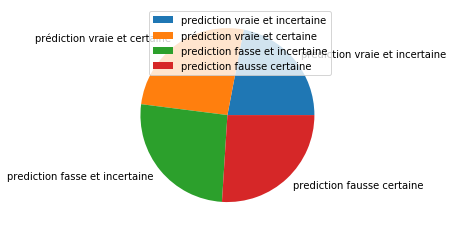

In [50]:
print(len(mc_predictions))
std_list = np.std(mc_predictions_array, axis = 0)#std: standard deviation (Ecart type)

print(len(std_list))


compteur_prediction_vraie_certaine=0
compteur_prediction_fausse_certaine=0
compteur_prediction_vraie_incertaine=0
compteur_prediction_fausse_incertaine=0
#On impose un seuil sur l'écart type de 10^-6
for k in range(len(std_list)):
    if all(std_list[k])<10**-6 and L[k]==0:
        compteur_prediction_fausse_certaine+=1
    if all(std_list[k])>10**-6 and L[k]==0:
        compteur_prediction_fausse_incertaine+=1
    if all(std_list[k])<10**-6 and L[k]!=0:
        compteur_prediction_vraie_certaine+=1
    if all(std_list[k])>10**-6 and L[k]!=0:
        compteur_prediction_vraie_incertaine+=1

print('compteur_prediction_fausse_certaine',compteur_prediction_fausse_certaine)
print('compteur_prediction_fausse_incertaine',compteur_prediction_fausse_incertaine)
print('compteur_prediction_vraie_certaine',compteur_prediction_vraie_certaine)
print('compteur_prediction_vraie_incertaine',compteur_prediction_vraie_incertaine)
    
x = [compteur_prediction_vraie_incertaine,compteur_prediction_vraie_certaine,compteur_prediction_fausse_incertaine,compteur_prediction_fausse_certaine]
plt.pie(x, labels = ['prediction vraie et incertaine', 'prédiction vraie et certaine','prediction fasse et incertaine','prediction fausse certaine'])



plt.legend()
plt.show()
    

## 3) Critère évaluation: Jacquard: Critère Angle+Aire

# IV) Application des méthodes évaluation incertitudes+Jacquard

In [ ]:
import tqdm

mc_predictions = []
for i in tqdm.tqdm(range(50)):
    y_p = mc_model.predict(X_train, batch_size=1000)
    mc_predictions.append(y_p)

In [ ]:
print(mc_predictions)

In [ ]:
print(Y_train)

In [ ]:
A=[]
for k in range(len(X_train)):
    p0 = np.array([p[k] for p in mc_predictions])
    posteriormean=p0.mean(axis=0).argmax()
    proba=max(p0.mean(axis=0))
    truelabel=y_test[k].argmax()
    incertitude=p0.std(axis=0)[p0.mean(axis=0).argmax()]
    A.append([posteriormean,truelabel,proba,incertitude])

In [ ]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]
for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    

    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()